In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from keras import optimizers,regularizers
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
import time
from datetime import datetime, timedelta
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
     
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    print(sentimentVector[0:10])
    print(price[0:10])
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,pd.rolling_mean(sentimentVector,5)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,10)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,15)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,20)),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    prices.append(price)

/home/andrea/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00         0.000      0.000     0.000   
1           2  2017-08-14 14:00:00         0.000      0.000     0.000   
2           3  2017-08-14 14:15:00         0.000      0.000     1.000   
3           4  2017-08-14 14:30:00         0.000      0.000     1.000   
4           5  2017-08-14 14:45:00         0.250      0.250     1.250   
5           6  2017-08-14 15:00:00         1.125      0.625     1.125   
6           7  2017-08-14 15:15:00         1.125      1.625     3.125   
7           8  2017-08-14 15:30:00         1.125      1.625     3.125   
8           9  2017-08-14 15:45:00         1.125      1.625     4.125   
9          10  2017-08-14 16:00:00         1.125      1.625     4.125   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0        0.000          0.0         0.00         0  
1       0.0        0.000          0.0         0.00         0  
2      

/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).mean()


   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.333333   
2           3  2017-08-14 14:15:00      0.000000   0.250000  0.083333   
3           4  2017-08-14 14:30:00      0.000000   0.250000  2.083333   
4           5  2017-08-14 14:45:00      0.333333   0.208333  1.680556   
5           6  2017-08-14 15:00:00      0.333333   0.208333  1.680556   
6           7  2017-08-14 15:15:00      0.333333   0.208333  1.680556   
7           8  2017-08-14 15:30:00      0.333333   0.302083  1.920139   
8           9  2017-08-14 15:45:00      0.166667   0.651042  3.460069   
9          10  2017-08-14 16:00:00      0.166667   0.651042  3.460069   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000     0.000000          0.0     0.000000         0  
1  0.333333     0.333333          0.0     0.000000         3  
2  0.58

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        1.0       5.0   
9          10  2017-08-14 16:00:00           0.0        1.0       5.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.000000   
2           3  2017-08-14 14:15:00      0.000000   0.000000  0.000000   
3           4  2017-08-14 14:30:00      0.000000   0.000000  0.000000   
4           5  2017-08-14 14:45:00      0.333333   0.333333  1.666667   
5           6  2017-08-14 15:00:00      0.333333   0.333333  1.666667   
6           7  2017-08-14 15:15:00      0.333333   0.333333  1.666667   
7           8  2017-08-14 15:30:00      0.333333   0.333333  1.666667   
8           9  2017-08-14 15:45:00      0.333333   0.333333  3.666667   
9          10  2017-08-14 16:00:00      0.333333   0.333333  3.666667   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0     0.000000          0.0          0.0         0  
1       0.0     0.000000          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       1.0   
2           3  2017-08-14 14:15:00           0.0        0.0       1.0   
3           4  2017-08-14 14:30:00           0.0        0.0       1.0   
4           5  2017-08-14 14:45:00           0.0        0.0       1.0   
5           6  2017-08-14 15:00:00           0.0        0.0       1.0   
6           7  2017-08-14 15:15:00           0.0        0.0       1.0   
7           8  2017-08-14 15:30:00           0.0        0.0       1.0   
8           9  2017-08-14 15:45:00           0.0        0.0       1.0   
9          10  2017-08-14 16:00:00           0.0        0.0       1.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         1  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0   0.000000       0.0   
1           2  2017-08-14 14:00:00           0.0   0.000000       0.0   
2           3  2017-08-14 14:15:00           0.0   0.000000       0.0   
3           4  2017-08-14 14:30:00           0.0   0.000000       0.0   
4           5  2017-08-14 14:45:00           0.0   0.000000       1.0   
5           6  2017-08-14 15:00:00           0.0   0.000000       1.0   
6           7  2017-08-14 15:15:00           0.0   0.000000       1.0   
7           8  2017-08-14 15:30:00           0.0   0.000000       1.0   
8           9  2017-08-14 15:45:00           0.0   0.333333       2.0   
9          10  2017-08-14 16:00:00           0.0   0.333333       2.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000          0.0          0.0     0.000000         0  
1  0.000000          0.0          0.0     0.000000         0  
2  0.00

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        2.0       3.0   
9          10  2017-08-14 16:00:00           0.0        2.0       3.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                    

In [3]:
def buildModel(l,n,d):
    model = Sequential()  
    model.add(Dense(n, input_dim=151,activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU()) 
    model.add(Dropout(d))
    model.add(Dense(math.floor(n/2), activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dropout(d))
    model.add(Dense(math.floor(n/4), activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU()) 
    model.add(Dense(1, activation='sigmoid')) 
    
    model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

    return model
def reset_weights(model):
    session=K.get_session()
    for layer in model.layers:
        if(hasattr(layer,'kernel_initializer')):
            layer.kernel.initializer.run(session=session)
            
           


Working on... AAPL
15.571701720841297
0.005338458253266777
working on d,u and l 0.5 64 0.05
working on d,u and l 0.5 64 0.01
working on d,u and l 0.5 128 0.05
working on d,u and l 0.5 128 0.01
Chart for BEST MODEL FOR: AAPL


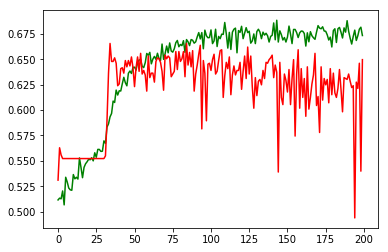

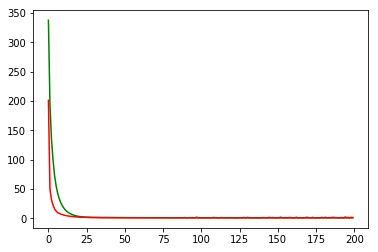

F1,score 0.547945205479452
G-score: 0.6127757103102611
Accuracy 0.6495575221238938
Window: 140
[[494  12]
 [384 240]]
Vol pos 3.943076620392339
Vol neg 1.748788340237616
Real Percentage of gain: 102.53688000229059
Percentage of gain: 1.9484053598529918
Total gain: 2201.6980566338807
000000000000000000000000000000000000000000000000
Percentile:  0
[[376   2]
 [331  44]]
753/753 [==============================] - 0s 48us/step
[1.5776749014616962, 0.5577689243027888]
Percentile:  1
[[59  9]
 [41 43]]
152/152 [==============================] - 0s 42us/step
[1.3801641079940294, 0.6710526315789473]
Percentile:  2
[[59  1]
 [ 1 78]]
139/139 [==============================] - 0s 44us/step
[0.34417496031994443, 0.9856115107913669]
Percentile:  3
[[ 0  0]
 [ 3 46]]
49/49 [==============================] - 0s 60us/step
[0.48427844230009587, 0.9387755102040817]
Percentile:  4
[[ 0  0]
 [ 7 28]]
35/35 [==============================] - 0s 97us/step
[0.5780235401221684, 0.8]
0000000000000000000000000

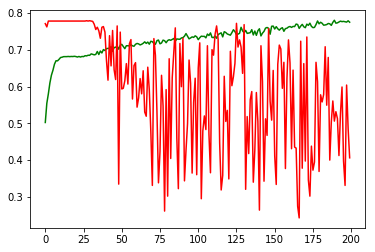

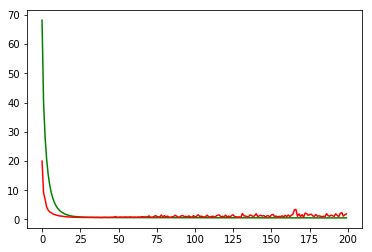

F1,score 0.4885844748858447
G-score: 0.4491951943557342
Accuracy 0.40636042265925726
Window: 140
[[139 112]
 [560 321]]
Vol pos 2.59893141522657
Vol neg 2.201402169636405
Real Percentage of gain: -71.7992870101304
Percentage of gain: -0.25073657861434795
Total gain: -283.83380699144186
000000000000000000000000000000000000000000000000
Percentile:  0
[[133  66]
 [314 117]]
630/630 [==============================] - 0s 36us/step
[1.9513275199466282, 0.3968253968727021]
Percentile:  1
[[  6  30]
 [215 134]]
385/385 [==============================] - 0s 39us/step
[1.8260333999410852, 0.36363636363636365]
Percentile:  2
[[ 0 16]
 [24 36]]
76/76 [==============================] - 0s 67us/step
[1.0992806647953235, 0.47368421052631576]
Percentile:  3
[[ 0  0]
 [ 6 27]]
33/33 [==============================] - 0s 79us/step
[0.6142137276403832, 0.8181818181818182]
Percentile:  4
[[0 0]
 [1 5]]
6/6 [==============================] - 0s 193us/step
[0.4975513815879822, 0.8333333134651184]
0000000000

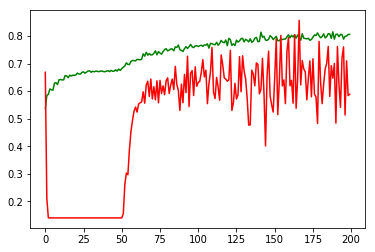

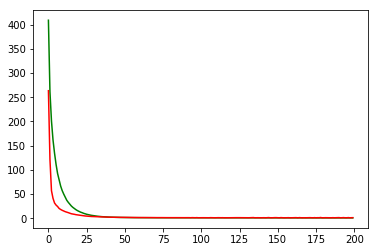

F1,score 0.6905311778290992
G-score: 0.7020378500174638
Accuracy 0.5883256528417818
Window: 140
[[ 84   7]
 [261 299]]
Vol pos 2.4923523173900337
Vol neg 1.4964960630985535
Real Percentage of gain: 1.2905936659846735
Percentage of gain: 0.850245764439279
Total gain: 553.5099926499706
000000000000000000000000000000000000000000000000
Percentile:  0
[[65  7]
 [77 33]]
182/182 [==============================] - 0s 46us/step
[0.9814749445234027, 0.5384615384615384]
Percentile:  1
[[ 19   0]
 [121  21]]
161/161 [==============================] - 0s 60us/step
[1.4380762799185995, 0.2484472049689441]
Percentile:  2
[[  0   0]
 [ 57 129]]
186/186 [==============================] - 0s 43us/step
[0.6954466976145263, 0.6935483877376843]
Percentile:  3
[[ 0  0]
 [ 5 71]]
76/76 [==============================] - 0s 77us/step
[0.37069396047215714, 0.9342105263157895]
Percentile:  4
[[45]]
45/45 [==============================] - 0s 82us/step
[0.19061587353547413, 1.0]
00000000000000000000000000000000

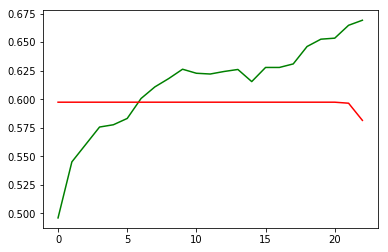

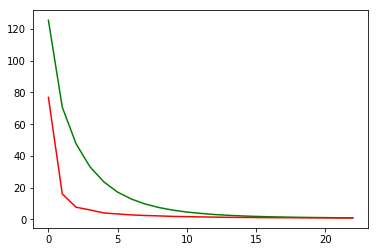

F1,score 0.7341202922990444
G-score: 0.09222082468011499
Accuracy 0.5814159298365095
Window: 140
[[  4 451]
 [ 22 653]]
Vol pos 3.389545714676355
Vol neg 2.3521115284060734
Real Percentage of gain: 117.70138065988733
Percentage of gain: 0.9861794527489313
Total gain: 1114.3827816062924
000000000000000000000000000000000000000000000000
Percentile:  0
[[  0 232]
 [  7 172]]
411/411 [==============================] - 0s 44us/step
[0.8661511792753734, 0.4184914856351495]
Percentile:  1
[[  4 107]
 [  2 250]]
363/363 [==============================] - 0s 69us/step
[0.7094590928272111, 0.699724517742136]
Percentile:  2
[[  0  97]
 [  3 106]]
206/206 [==============================] - 0s 67us/step
[0.8019246840939939, 0.5145631073748024]
Percentile:  3
[[ 0 14]
 [10 77]]
101/101 [==============================] - 0s 92us/step
[0.647530724506567, 0.7623762376237624]
Percentile:  4
[[47]]
47/47 [==============================] - 0s 71us/step
[0.49499890905745486, 1.0]
000000000000000000000000000

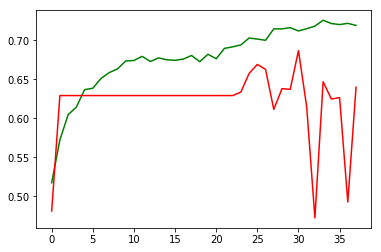

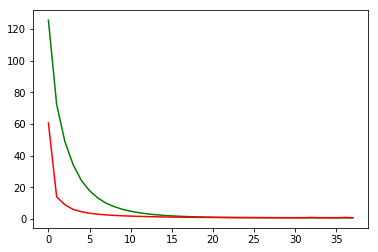

F1,score 0.7362281270252753
G-score: 0.5436234784076295
Accuracy 0.6398230064231738
Window: 140
[[155 264]
 [143 568]]
Vol pos 1.601581471532058
Vol neg 1.528086116914929
Real Percentage of gain: 102.47112490978668
Percentage of gain: 0.4743472162241609
Total gain: 536.0123543333018
000000000000000000000000000000000000000000000000
Percentile:  0
[[132 160]
 [ 73 179]]
544/544 [==============================] - 0s 45us/step
[0.8075932509758893, 0.5716911764705882]
Percentile:  1
[[ 19  55]
 [ 17 222]]
313/313 [==============================] - 0s 50us/step
[0.6505403173998141, 0.769968051308641]
Percentile:  2
[[  2  21]
 [ 29 111]]
163/163 [==============================] - 0s 69us/step
[0.662530996316781, 0.6932515337423313]
Percentile:  3
[[ 2 18]
 [22 39]]
81/81 [==============================] - 0s 115us/step
[0.8292713194717596, 0.5061728396901378]
Percentile:  4
[[ 0 10]
 [ 2 16]]
28/28 [==============================] - 0s 51us/step
[0.7324782013893127, 0.5714285969734192]
00000

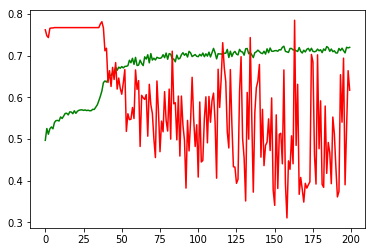

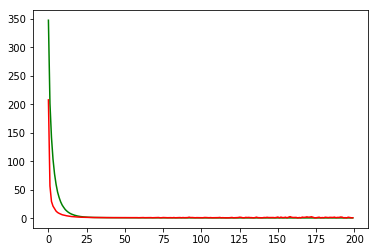

F1,score 0.7115256495669554
G-score: 0.6209045439615768
Accuracy 0.6174911661040656
Window: 140
[[165  98]
 [335 534]]
Vol pos 3.206481829532042
Vol neg 2.8697260986975324
Real Percentage of gain: 60.20701887046036
Percentage of gain: 0.8822786202357472
Total gain: 998.7393981068658
000000000000000000000000000000000000000000000000
Percentile:  0
[[162  50]
 [157 153]]
522/522 [==============================] - 0s 49us/step
[0.7993003668912982, 0.603448275862069]
Percentile:  1
[[  2  35]
 [156 275]]
468/468 [==============================] - 0s 49us/step
[0.9842182367275922, 0.5918803418803419]
Percentile:  2
[[ 0 13]
 [22 70]]
105/105 [==============================] - 0s 81us/step
[0.6920653899510701, 0.6666666668085824]
Percentile:  3
[[14]]
14/14 [==============================] - 0s 123us/step
[0.16480819880962372, 1.0]
Percentile:  4
[[21]]
21/21 [==============================] - 0s 82us/step
[0.12119893729686737, 1.0]
000000000000000000000000000000000000000000000000
Working on.

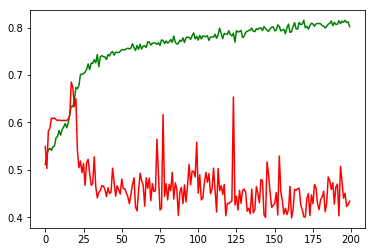

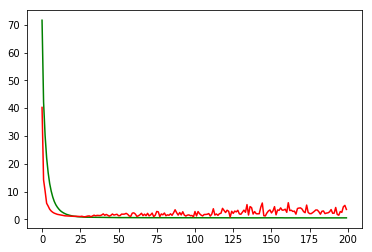

F1,score 0.1349527665317139
G-score: 0.2682484610246725
Accuracy 0.43374558072208097
Window: 140
[[441   7]
 [634  50]]
Vol pos 2.6303259763219438
Vol neg 2.1006194960989273
Real Percentage of gain: -87.3413691755365
Percentage of gain: -0.04859279383863785
Total gain: -55.007042625338045
000000000000000000000000000000000000000000000000
Percentile:  0
[[112   4]
 [227  11]]
354/354 [==============================] - 0s 69us/step
[4.745318663322319, 0.3474576271186441]
Percentile:  1
[[111   3]
 [211  17]]
342/342 [==============================] - 0s 75us/step
[3.3047356425147307, 0.3742690058479532]
Percentile:  2
[[127   0]
 [131  20]]
278/278 [==============================] - 0s 73us/step
[2.5786023182030635, 0.5287769784172662]
Percentile:  3
[[63  0]
 [50  1]]
114/114 [==============================] - 0s 106us/step
[1.9909997059587847, 0.5614035087719298]
Percentile:  4
[[28  0]
 [14  0]]
42/42 [==============================] - 0s 137us/step
[0.8205961954025995, 0.6666666666666

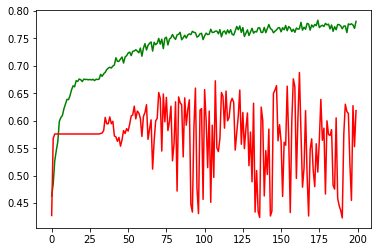

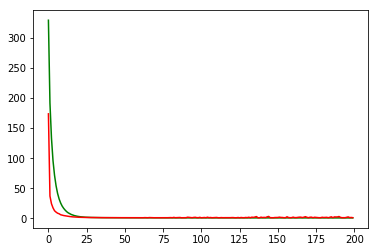

F1,score 0.7306967984934087
G-score: 0.46330525431611064
Accuracy 0.618666668203142
Window: 140
[[114 363]
 [ 66 582]]
Vol pos 1.963638710721506
Vol neg 1.643644460393183
Real Percentage of gain: 49.86351062492142
Percentage of gain: 0.5880613948031047
Total gain: 661.5690691534928
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 38 182]
 [ 42 254]]
516/516 [==============================] - 0s 88us/step
[1.0450233498284982, 0.5658914728682171]
Percentile:  1
[[  4  92]
 [ 21 206]]
323/323 [==============================] - 0s 75us/step
[0.8331003425291079, 0.6501547987616099]
Percentile:  2
[[11 39]
 [ 2 86]]
138/138 [==============================] - 0s 104us/step
[0.6443779567877451, 0.7028985515884731]
Percentile:  3
[[22 36]
 [ 0 28]]
86/86 [==============================] - 0s 135us/step
[0.771873953730561, 0.5813953498768252]
Percentile:  4
[[38 14]
 [ 0  6]]
58/58 [==============================] - 0s 109us/step
[0.6154786882729366, 0.7586206855445072]
0000000

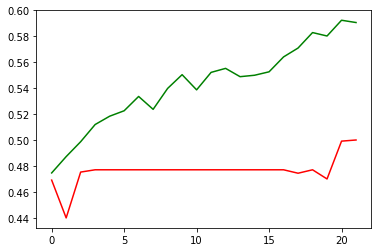

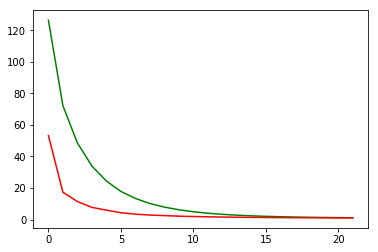

F1,score 0.198300283286119
G-score: 0.32955820215647585
Accuracy 0.5000000002106171
Window: 140
[[496  44]
 [522  70]]
Vol pos 3.011574721291386
Vol neg 2.7023159716713074
Real Percentage of gain: -91.96677693082134
Percentage of gain: 0.15462937481003924
Total gain: 175.04045228496443
000000000000000000000000000000000000000000000000
Percentile:  0
[[201  26]
 [175  26]]
428/428 [==============================] - 0s 89us/step
[0.7701879561504471, 0.5303738323327537]
Percentile:  1
[[181  16]
 [268  36]]
501/501 [==============================] - 0s 74us/step
[0.7877423530091306, 0.4331337326836443]
Percentile:  2
[[42  0]
 [66  8]]
116/116 [==============================] - 0s 103us/step
[0.7928229262088907, 0.43103448275862066]
Percentile:  3
[[60  0]
 [12  0]]
72/72 [==============================] - 0s 124us/step
[0.7077885733710395, 0.8333333333333334]
Percentile:  4
[[11  2]
 [ 0  0]]
13/13 [==============================] - 0s 233us/step
[0.6701328158378601, 0.8461538553237915]
0

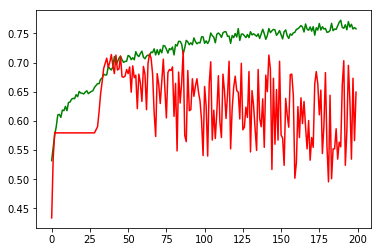

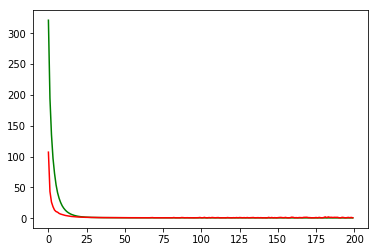

F1,score 0.6496028243601059
G-score: 0.6576601776014004
Accuracy 0.6492932851659957
Window: 140
[[367 109]
 [288 368]]
Vol pos 4.183717866615606
Vol neg 3.003369465855299
Real Percentage of gain: 310.9661201509623
Percentage of gain: 1.6631580865882654
Total gain: 1882.6949540179164
000000000000000000000000000000000000000000000000
Percentile:  0
[[268  45]
 [189  57]]
559/559 [==============================] - 0s 107us/step
[0.9083481668786201, 0.5813953494769729]
Percentile:  1
[[ 96  21]
 [ 77 143]]
337/337 [==============================] - 0s 105us/step
[0.5756532480879424, 0.7091988132332482]
Percentile:  2
[[ 3 28]
 [17 55]]
103/103 [==============================] - 0s 134us/step
[0.8338929330839694, 0.5631067961165048]
Percentile:  3
[[ 0 15]
 [ 0 65]]
80/80 [==============================] - 0s 126us/step
[0.4749251246452332, 0.8125]
Percentile:  4
[[ 0  0]
 [ 4 47]]
51/51 [==============================] - 0s 148us/step
[0.2382326745519451, 0.9215686274509803]
000000000000000

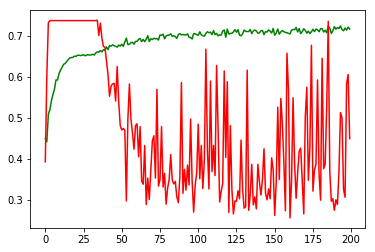

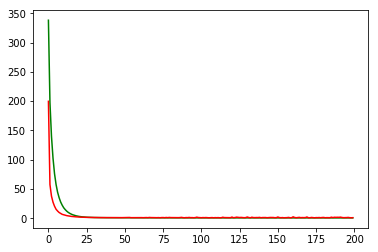

F1,score 0.5361131794489947
G-score: 0.4650749223088164
Accuracy 0.44964664195114645
Window: 140
[[149 148]
 [475 360]]
Vol pos 4.168223379938933
Vol neg 4.47428538262673
Real Percentage of gain: -65.56733904680185
Percentage of gain: -0.58821032949429
Total gain: -665.8540929875362
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 87  83]
 [150 140]]
460/460 [==============================] - 0s 87us/step
[0.9097592348637789, 0.4934782608695652]
Percentile:  1
[[ 26  34]
 [145 123]]
328/328 [==============================] - 0s 94us/step
[0.8446820232926345, 0.45426829268292684]
Percentile:  2
[[ 15  23]
 [140  55]]
233/233 [==============================] - 0s 98us/step
[1.0080147022341455, 0.3004291846772632]
Percentile:  3
[[19  8]
 [37 33]]
97/97 [==============================] - 0s 157us/step
[0.8470321784621662, 0.5360824742268041]
Percentile:  4
[[1 0]
 [2 9]]
12/12 [==============================] - 0s 284us/step
[0.5268393158912659, 0.8333333134651184]
00000

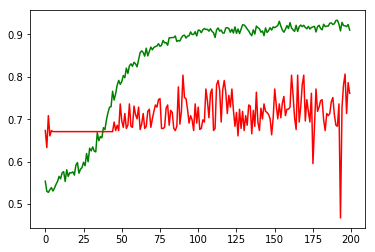

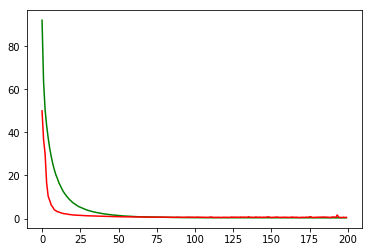

F1,score 0.8282097649186256
G-score: 0.696053020672882
Accuracy 0.7613065329628375
Window: 140
[[ 74  57]
 [ 38 229]]
Vol pos 1.3015802513288353
Vol neg 0.7964430041940994
Real Percentage of gain: 221.7997033855988
Percentage of gain: 0.8007958059150695
Total gain: 318.71673075419767
000000000000000000000000000000000000000000000000
Percentile:  0
[[43 54]
 [10 65]]
172/172 [==============================] - 0s 132us/step
[0.6465912842473318, 0.627906976744186]
Percentile:  1
[[23  3]
 [ 8 66]]
100/100 [==============================] - 0s 164us/step
[0.43672014951705934, 0.89]
Percentile:  2
[[ 7  0]
 [18 64]]
89/89 [==============================] - 0s 148us/step
[0.40746720051497554, 0.7977528036310432]
Percentile:  3
[[ 0  0]
 [ 2 21]]
23/23 [==============================] - 0s 162us/step
[0.278218150138855, 0.9130434989929199]
Percentile:  4
[[12]]
12/12 [==============================] - 0s 361us/step
[0.12456420809030533, 1.0]
000000000000000000000000000000000000000000000000
Wor

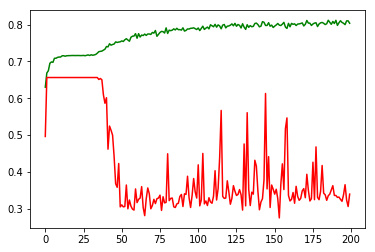

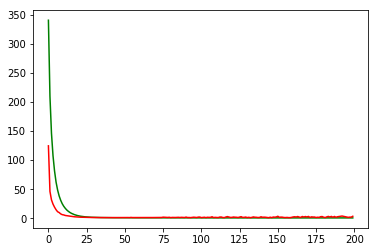

F1,score 0.08128078817733989
G-score: 0.20043152245040188
Accuracy 0.33923826627334314
Window: 140
[[350  38]
 [708  33]]
Vol pos 1.8307163649042726
Vol neg 3.000093396748386
Real Percentage of gain: -247.73106455709396
Percentage of gain: -1.361297879730699
Total gain: -1536.9053062159592
000000000000000000000000000000000000000000000000
Percentile:  0
[[249  28]
 [264  20]]
561/561 [==============================] - 0s 106us/step
[2.4457323690096113, 0.47950089126559714]
Percentile:  1
[[ 58   5]
 [248  13]]
324/324 [==============================] - 0s 121us/step
[3.7029200076229043, 0.2191358024691358]
Percentile:  2
[[ 20   5]
 [133   0]]
158/158 [==============================] - 0s 120us/step
[3.9742772156679176, 0.12658227848101267]
Percentile:  3
[[23  0]
 [43  0]]
66/66 [==============================] - 0s 189us/step
[3.2356815193638657, 0.3484848484848485]
Percentile:  4
[[ 0  0]
 [18  0]]
18/18 [==============================] - 0s 240us/step
[4.912765979766846, 0.0]
000000

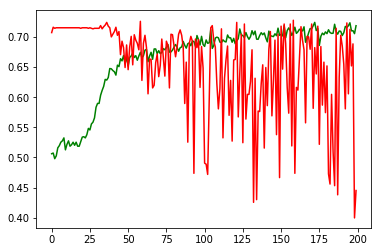

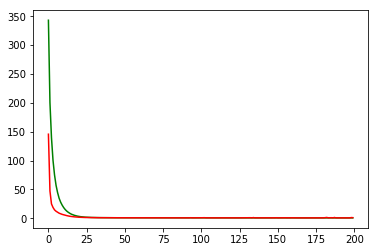

F1,score 0.5218726016884113
G-score: 0.4601153139345191
Accuracy 0.44523597504024726
Window: 140
[[160 160]
 [463 340]]
Vol pos 1.9816071415458698
Vol neg 1.8908283865150486
Real Percentage of gain: -23.900099436759294
Percentage of gain: -0.16668077829558356
Total gain: -187.18251402594035
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 80  85]
 [199  82]]
446/446 [==============================] - 0s 107us/step
[1.0918617478400603, 0.36322869965180155]
Percentile:  1
[[ 28  27]
 [103 158]]
316/316 [==============================] - 0s 147us/step
[0.8154238356819635, 0.588607595691198]
Percentile:  2
[[ 17   9]
 [115  73]]
214/214 [==============================] - 0s 123us/step
[0.9573730503287271, 0.420560747385025]
Percentile:  3
[[27 29]
 [44 25]]
125/125 [==============================] - 0s 156us/step
[0.9383825025558472, 0.4160000015497208]
Percentile:  4
[[8 9]
 [2 1]]
20/20 [==============================] - 0s 255us/step
[0.8090110421180725, 0.449999988079

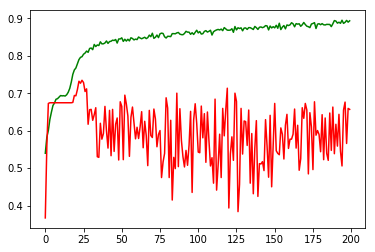

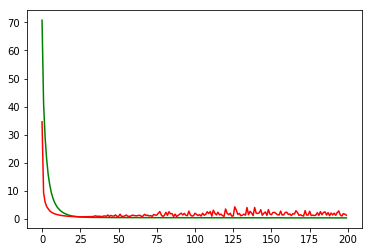

F1,score 0.7528662420382166
G-score: 0.5656259892379482
Accuracy 0.6569407595458229
Window: 140
[[152 216]
 [172 591]]
Vol pos 2.7175661683815244
Vol neg 2.07125835013849
Real Percentage of gain: 100.07356641989786
Percentage of gain: 1.0747156704277088
Total gain: 1215.5034232537387
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 77 131]
 [ 69 178]]
455/455 [==============================] - 0s 142us/step
[1.568638134264684, 0.5604395605378099]
Percentile:  1
[[ 75  54]
 [ 37 168]]
334/334 [==============================] - 0s 156us/step
[0.994127183260318, 0.7275449101796407]
Percentile:  2
[[  0  14]
 [ 59 119]]
192/192 [==============================] - 0s 137us/step
[1.5707697123289108, 0.6197916666666666]
Percentile:  3
[[  0  10]
 [  7 105]]
122/122 [==============================] - 0s 160us/step
[0.40223264352220006, 0.8606557347735421]
Percentile:  4
[[ 0  7]
 [ 0 19]]
26/26 [==============================] - 0s 173us/step
[1.0057039260864258, 0.73076921701

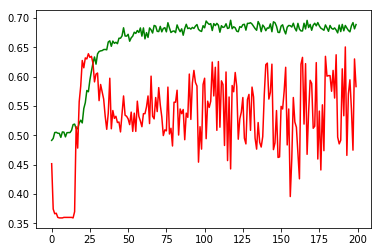

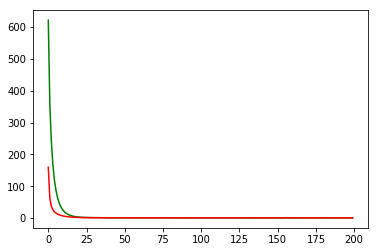

F1,score 0.6832884097035041
G-score: 0.509705077675306
Accuracy 0.5829636217644496
Window: 140
[[150 256]
 [214 507]]
Vol pos 3.8016437217706573
Vol neg 2.363602588171136
Real Percentage of gain: 41.39721943183186
Percentage of gain: 1.2305117202865024
Total gain: 1386.786708762888
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 72 129]
 [161 113]]
475/475 [==============================] - 0s 129us/step
[1.0568561563993755, 0.3894736844614932]
Percentile:  1
[[ 39  65]
 [ 13 137]]
254/254 [==============================] - 0s 129us/step
[0.8179860410727854, 0.6929133886427391]
Percentile:  2
[[  5  33]
 [ 39 183]]
260/260 [==============================] - 0s 153us/step
[0.6088969432390653, 0.7230769230769231]
Percentile:  3
[[ 8 17]
 [ 0 63]]
88/88 [==============================] - 0s 162us/step
[0.36436569690704346, 0.8068181818181818]
Percentile:  4
[[25 12]
 [ 0 11]]
48/48 [==============================] - 0s 241us/step
[0.48315806190172833, 0.75]
000000000000

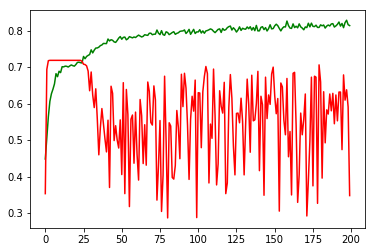

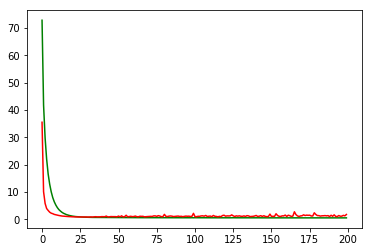

F1,score 0.34402852049910876
G-score: 0.386874108185267
Accuracy 0.34809566111666
Window: 140
[[200 118]
 [618 193]]
Vol pos 3.3097233324465747
Vol neg 2.6963959262712107
Real Percentage of gain: -247.18932868471427
Percentage of gain: -0.6056918796139124
Total gain: -683.826132084107
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 81  53]
 [362  83]]
579/579 [==============================] - 0s 149us/step
[1.9511295471578476, 0.2832469775989677]
Percentile:  1
[[ 30  21]
 [185  72]]
308/308 [==============================] - 0s 152us/step
[1.4739850651134143, 0.33116883116883117]
Percentile:  2
[[79 41]
 [36 28]]
184/184 [==============================] - 0s 155us/step
[0.9983589778775754, 0.5815217392924039]
Percentile:  3
[[10  3]
 [24  6]]
43/43 [==============================] - 0s 237us/step
[1.1144365543542907, 0.372093026028123]
Percentile:  4
[[ 0  0]
 [10  2]]
12/12 [==============================] - 0s 387us/step
[0.8506909012794495, 0.1666666716337204]
0

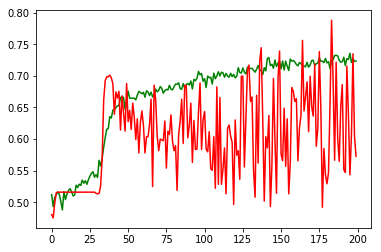

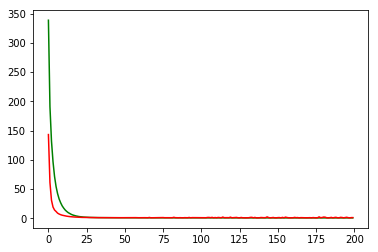

F1,score 0.691025641025641
G-score: 0.42601849888082166
Accuracy 0.5726950356723569
Window: 140
[[107 475]
 [  7 539]]
Vol pos 3.086568342972312
Vol neg 3.442999883107571
Real Percentage of gain: -93.14640512101977
Percentage of gain: 0.2964514236722202
Total gain: 334.39720590226443
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 38 301]
 [  4 265]]
608/608 [==============================] - 0s 187us/step
[1.3567155905460055, 0.49835526315789475]
Percentile:  1
[[ 31  72]
 [  3 201]]
307/307 [==============================] - 0s 178us/step
[0.5964586385298242, 0.755700325732899]
Percentile:  2
[[ 8  4]
 [ 0 70]]
82/82 [==============================] - 0s 242us/step
[0.20027101839460978, 0.9512195121951219]
Percentile:  3
[[ 7 34]
 [ 0  0]]
41/41 [==============================] - 0s 278us/step
[1.0147691528971603, 0.17073170731707318]
Percentile:  4
[[23 63]
 [ 0  0]]
86/86 [==============================] - 0s 207us/step
[1.333999540916709, 0.2674418625443481]
000

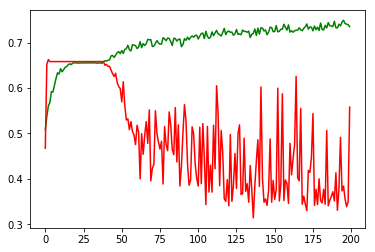

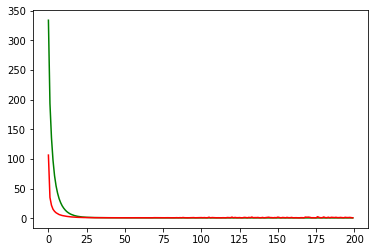

F1,score 0.6778783958602845
G-score: 0.43886199764528655
Accuracy 0.5581189001304657
Window: 140
[[105 280]
 [218 524]]
Vol pos 1.4893691540514058
Vol neg 1.2593424124845947
Real Percentage of gain: 117.01070960684801
Percentage of gain: 0.2747654627160658
Total gain: 309.66067648100613
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 53 147]
 [ 40 147]]
387/387 [==============================] - 0s 186us/step
[0.7508774506029232, 0.5167958657870921]
Percentile:  1
[[ 35  69]
 [ 56 150]]
310/310 [==============================] - 0s 183us/step
[0.7151186285480376, 0.5967741936445237]
Percentile:  2
[[ 16  52]
 [ 91 114]]
273/273 [==============================] - 0s 177us/step
[0.8347284330989851, 0.4761904762450592]
Percentile:  3
[[ 1 11]
 [21 59]]
92/92 [==============================] - 0s 181us/step
[0.6534196086551832, 0.6521739130434783]
Percentile:  4
[[ 0  0]
 [10 53]]
63/63 [==============================] - 0s 180us/step
[0.5911446005579025, 0.8412698270782

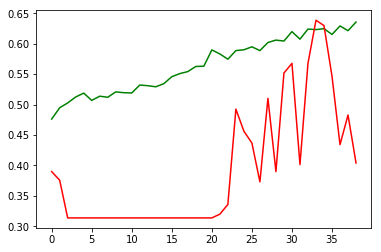

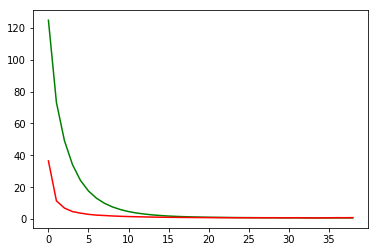

F1,score 0.2752688172043011
G-score: 0.3909830198291041
Accuracy 0.4040671971179446
Window: 140
[[329  26]
 [648 128]]
Vol pos 3.2086585399245395
Vol neg 3.4488165770883827
Real Percentage of gain: -63.68659747292406
Percentage of gain: -0.7587492663236566
Total gain: -858.1454202120556
000000000000000000000000000000000000000000000000
Percentile:  0
[[217  13]
 [241  58]]
529/529 [==============================] - 0s 169us/step
[0.8022853906190688, 0.5198487712665406]
Percentile:  1
[[ 36  12]
 [243  53]]
344/344 [==============================] - 0s 170us/step
[0.9798354672831159, 0.2587209316187127]
Percentile:  2
[[18  0]
 [85  5]]
108/108 [==============================] - 0s 206us/step
[0.9051060301286203, 0.2129629632389104]
Percentile:  3
[[11  1]
 [64  4]]
80/80 [==============================] - 0s 201us/step
[1.0342292070388794, 0.1875]
Percentile:  4
[[46  0]
 [15  7]]
68/68 [==============================] - 0s 249us/step
[0.5089813786394456, 0.7794117647058824]
00000000000

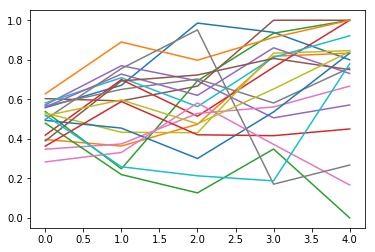

In [4]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
earlyStopping=EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        yprice=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        
        y=np.array(y)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        yvolatility=np.array(yvolatility)
       
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    


        lspace=[0.05,0.01]
        dropspace=[0.5]
        uspace=[64,128]
        bestsvm=None
        bestca=[]
        bestcl=[]
        maxacc=0
        cvacc=0
        maxu=0
        maxl=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for d in dropspace:
            for u in uspace:
                #print()
                for l in lspace:
                    
                   
                    print('=========================================================')
                    print('working on d,u and l',d,u,l)
                    
                    cvacclist=[]
                    #faccio cross validation
                    #start with 40% as train and 10% for validation and then i move in percentege
                    # 0-40 40-50
                    # 0-50 50-60
                    # 0-60 60-70 
                    #etc test set is completely external i do in some way error extimation changin the ticker
                    trainpoint=math.floor(len(x_tv)*0.40)
                    dimval=math.floor(trainpoint*0.25)
                    endval=trainpoint+dimval
                    model=buildModel(l,u,d)
                    bestepoch=200
                    epoch=200
                    for i in range(0,6):
                        #print('-----')
                        x_train=x_tv[0:trainpoint]
                        y_train=y_tv[0:trainpoint]
                        x_val=x_tv[trainpoint:endval]
                        y_val=y_tv[trainpoint:endval]

                        trainpoint=trainpoint+dimval
                        endval=endval+dimval
                        
                        x_train,y_train=smote(x_train,y_train)
                        if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                            x_val,y_val=smote(x_val,y_val)
                        else:
                            totu=totu+1

                        history=model.fit(x_train, y_train, epochs = 200,batch_size =128, verbose=0, validation_data=(x_val, y_val),
                                          shuffle=True,callbacks=[earlyStopping])
                        
                        prediction=model.predict(x_val, batch_size=128, verbose=0)
                        for el in range(0,len(prediction)):
                            if(prediction[el]>0.5):
                                prediction[el]=1
                            else:
                                prediction[el]=0
                        if(i==5):
                            epoch=len(history.history['val_loss'])
                            
                       
                       
                        
                        #i take the last one
                        #maxAcc=history.history['val_acc'][len(history.history['val_acc'])-1]
                        #USING G SCORE AS MODEL SELECTION METRIC
                        maxAcc=geometric_mean_score(y_val, prediction)
                        cvacclist.append(maxAcc)
                        reset_weights(model)
                        
                    cvacc=sum(cvacclist)/len(cvacclist)
                    if(cvacc>maxacc):
                        maxacc=cvacc
                        maxu=u
                        maxl=l
                        bestepoch=epoch
                        
                        
                    
                    
        bestmodel=model=buildModel(maxl,maxu,0.5)
        history=model.fit(x_tv, y_tv, epochs = bestepoch,batch_size =128, verbose=0, validation_data=(x_test, y_test),
                                          shuffle=True)
        prediction=model.predict(x_test, batch_size=128, verbose=0)
        for el in range(0,len(prediction)):
            if(prediction[el]>0.5):
                prediction[el]=1
            else:
                prediction[el]=0
            
        
        
        print('=========================================================')
        print('=========================================================')
        print('=========================================================')
        print('=========================================================')
        print('Chart for BEST MODEL FOR:',files[o-1])
        plt.plot(history.history['acc'],'g')
        plt.plot(history.history['val_acc'],'r')
        plt.show()
        plt.plot(history.history['loss'],'g')
        plt.plot(history.history['val_loss'],'r')
        plt.show()
        acctotal.append(history.history['val_acc'][len(history.history['val_acc'])-1])
        confmatrix=confusion_matrix(y_test, prediction)
        
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=history.history['val_acc'][len(history.history['val_acc'])-1]
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        #plt.plot(chart)
        #plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=model.predict(x_test[distribution[g]])
                for el in range(0,len(predictionp)):
                    if(predictionp[el]>0.5):
                        predictionp[el]=1
                    else:
                        predictionp[el]=0
                    
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(model.evaluate(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=model.evaluate(x_test[distribution[g]],y_test[distribution[g]], verbose=0)
            chartscore.append(tempscore[1])    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

            

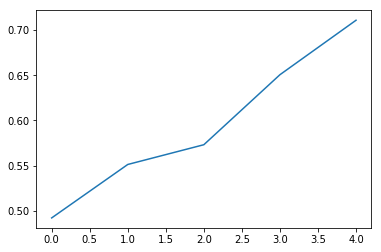

In [5]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

In [ ]:
#print('ACCURACY on val:',maxacc)
        print('Test')
        model=buildModel(maxl,maxu)
        x_tv,y_tv=smote(x_tv,y_tv)
        history=model.fit(x_tv, y_tv, epochs=20,shuffle=False, verbose=2,batch_size=100,validation_data=(x_test,y_test))
        plt.plot(history.history['acc'],'g')
        plt.plot(history.history['val_acc'],'r')
        plt.show()
        plt.plot(history.history['loss'],'g')
        plt.plot(history.history['val_loss'],'r')
        plt.show()
        
        e=findMaxAccStep(history.history['val_acc'],history.history['val_loss'])
        model.fit(x_tv, y_tv, epochs=e,shuffle=False, verbose=0,batch_size=10)
        prediction=model.predict( x_test, batch_size=10, verbose=0, steps=None)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [ ]:
tempacc=accstocksresults

In [ ]:
import operator
t=[0,0,0]
for i in range(0,len(tempacc)):
    t=np.add(t,tempacc[i])
print(t)
print(t/len(tempacc))

In [ ]:
Working on... AAPL
/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
Window: 2
[[249  81]
 [263 107]]
F1,score 0.38351254480286734
Accuracy: 0.5085714285714286
Window: 4
[[  0 323]
 [  0 376]]
F1,score 0.6995348837209303
Accuracy: 0.5379113018597997
Window: 6
[[243  85]
 [271 100]]
F1,score 0.35971223021582727
Accuracy: 0.4907010014306152
Window: 10
[[247  77]
 [234 140]]
F1,score 0.4737732656514382
Accuracy: 0.5544412607449857
Window: 16
[[257  67]
 [259 114]]
F1,score 0.4115523465703971
Accuracy: 0.5322812051649928
Window: 24
[[210  96]
 [253 136]]
F1,score 0.43800322061191627
Accuracy: 0.497841726618705
Window: 32
[[192 107]
 [217 178]]
F1,score 0.5235294117647058
Accuracy: 0.5331412103746398
Window: 42
[[219  76]
 [235 162]]
F1,score 0.5102362204724409
Accuracy: 0.5505780346820809
Window: 56
[[245  62]
 [227 155]]
F1,score 0.5175292153589315
Accuracy: 0.5805515239477503
Window: 66
[[  3 316]
 [  0 368]]
F1,score 0.6996197718631179
Accuracy: 0.5400291120815138
Window: 87
[[272  61]
 [197 153]]
F1,score 0.5425531914893618
Accuracy: 0.6222547584187409
Window: 100
[[188 135]
 [138 219]]
F1,score 0.6160337552742615
Accuracy: 0.5985294117647059
Window: 112
[[188 129]
 [134 227]]
F1,score 0.6331938633193863
Accuracy: 0.612094395280236
Window: 125
[[266  46]
 [236 127]]
F1,score 0.47388059701492535
Accuracy: 0.5822222222222222
Window: 140
[[315  24]
 [258  75]]
F1,score 0.3472222222222222
Accuracy: 0.5803571428571429
Window: 160
[[329  46]
 [172 121]]
F1,score 0.5260869565217392
Accuracy: 0.6736526946107785
Window: 175
[[365  15]
 [227  58]]
F1,score 0.3240223463687151
Accuracy: 0.6360902255639098
Window: 190
[[123 236]
 [ 57 246]]
F1,score 0.6267515923566879
Accuracy: 0.5574018126888217
Window: 205
[[ 27 314]
 [ 34 284]]
F1,score 0.6200873362445416
Accuracy: 0.47192716236722304
Window: 220
[[312   9]
 [294  41]]
F1,score 0.21298701298701297
Accuracy: 0.538109756097561
Window: 245
[[  0 260]
 [  0 391]]
F1,score 0.7504798464491362
Accuracy: 0.6006144393241167
Window: 260
[[246   7]
 [291 104]]
F1,score 0.41106719367588934
Accuracy: 0.5401234567901234
Window: 300
[[ 29 228]
 [ 48 335]]
F1,score 0.7082452431289641
Accuracy: 0.56875
Window: 350
[[127 109]
 [124 270]]
F1,score 0.6985769728331177
Accuracy: 0.6301587301587301
Window: 400
[[ 12 248]
 [ 17 343]]
F1,score 0.7213459516298634
Accuracy: 0.5725806451612904
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 15, 15, 15, 15, 15, 30, 30, 30, 30, 30, 30, 45, 45, 45]
[0.5085714285714286, 0.5379113018597997, 0.4907010014306152, 0.5544412607449857, 0.5322812051649928, 0.497841726618705, 0.5331412103746398, 0.5505780346820809, 0.5805515239477503, 0.5400291120815138, 0.6222547584187409, 0.5985294117647059, 0.612094395280236, 0.5822222222222222, 0.5803571428571429, 0.6736526946107785, 0.6360902255639098, 0.5574018126888217, 0.47192716236722304, 0.538109756097561, 0.6006144393241167, 0.5401234567901234, 0.56875, 0.6301587301587301, 0.5725806451612904]
accuracy
accuracy
#old with f1 score in model selection
aapl=[0.5213675213675214, 0.5327635327635327, 0.5242165242165242, 0.5278174037089871, 0.5228571428571429, 0.5444126074498568, 0.5589080459770115, 0.5662824207492796, 0.5433526011560693, 0.5130434782608696, 0.5883211678832116, 0.6881405563689604, 0.6852941176470588, 0.5353982300884956, 0.5422222222222223, 0.4157973174366617, 0.4041916167664671, 0.44511278195488724, 0.48338368580060426, 0.5128983308042488, 0.6131498470948012, 0.6236559139784946, 0.6003110419906688, 0.627172195892575, 0.5826645264847512]
adbe=[0.5498575498575499, 0.5698005698005698, 0.5783475783475783, 0.6148359486447932, 0.6414285714285715, 0.6575931232091691, 0.6752873563218391, 0.6772334293948127, 0.6734104046242775, 0.6652173913043479, 0.6802919708029197, 0.6881405563689604, 0.7147058823529412, 0.7684365781710915, 0.7911111111111111, 0.8002980625931445, 0.7754491017964071, 0.7894736842105263, 0.8187311178247734, 0.8634294385432474, 0.8929663608562691, 0.9139784946236559, 0.9891135303265941, 0.9936808846761453, 1.0]
adi=[0.51994301994302, 0.5341880341880342, 0.550641940085592, 0.5428571428571428, 0.5464949928469242, 0.5544412607449857, 0.5502873563218391, 0.5749279538904899, 0.6034732272069464, 0.5892597968069666, 0.5883211678832116, 0.5791788856304986, 0.5441176470588235, 0.518463810930576, 0.46735905044510384, 0.45671641791044776, 0.4587706146926537, 0.4879518072289157, 0.5128593040847201, 0.5486322188449848, 0.4946401225114854, 0.5261538461538462, 0.557632398753894, 0.7215189873417721, 0.6270096463022508]
googl=[0.496551724137931, 0.5189655172413793, 0.5413793103448276, 0.538860103626943, 0.5657439446366782, 0.5538194444444444, 0.5679442508710801, 0.5856643356643356, 0.5421052631578948, 0.5475352112676056, 0.5808170515097691, 0.5508021390374331, 0.517921146953405, 0.4748201438848921, 0.42857142857142855, 0.3825136612021858, 0.36813186813186816, 0.3664825046040516, 0.37777777777777777, 0.3817504655493482, 0.37969924812030076, 0.43478260869565216, 0.5950095969289827, 0.5694716242661448, 0.592814371257485]
results=np.add(aapl,adbe)
results=np.add(results,adi)
results=np.add(results,googl)
tot=results/4

print(tot)
plt.plot(trendwindowtime,tot)
plt.show()

In [ ]:
#new with accuracy in model selection
aapl=[0.5252976190476191, 0.5320417287630402, 0.5171385991058122, 0.5164179104477612, 0.5186846038863976, 0.5412293853073463, 0.551051051051051, 0.5542168674698795, 0.5370650529500757, 0.5174506828528073, 0.5114503816793893, 0.6380368098159509, 0.5169230769230769, 0.517774343122102, 0.47360248447204967, 0.415625, 0.41130298273155413, 0.45425867507886436, 0.47385103011093505, 0.4888535031847134, 0.5826645264847512, 0.5935483870967742, 0.5800653594771242, 0.6079734219269103, 0.5608108108108109]
adbe=[0.5484330484330484, 0.5669515669515669, 0.5740740740740741, 0.6105563480741797, 0.6371428571428571, 0.660458452722063, 0.6810344827586207, 0.6873198847262247, 0.6748554913294798, 0.6681159420289855, 0.6802919708029197, 0.6925329428989752, 0.7176470588235294, 0.7743362831858407, 0.794074074074074, 0.8107302533532041, 0.7859281437125748, 0.7984962406015037, 0.8157099697885196, 0.858877086494689, 0.8929663608562691, 0.9109062980030722, 0.9891135303265941, 0.9936808846761453, 1.0]
adi=[0.5155763239875389, 0.5179407176287052, 0.5226209048361935, 0.515625, 0.5258215962441315, 0.5196232339089482, 0.5125786163522013, 0.5031545741324921, 0.5134706814580031, 0.47217806041335453, 0.4384, 0.44694533762057875, 0.4338709677419355, 0.4359805510534846, 0.38925081433224756, 0.41475409836065574, 0.42504118616144976, 0.46357615894039733, 0.34608985024958405, 0.5284280936454849, 0.47386172006745364, 0.4864406779661017, 0.35738831615120276, 0.6888111888111889, 0.7135231316725978]
googl=[0.5153970826580226, 0.5340909090909091, 0.538961038961039, 0.551219512195122, 0.5765472312703583, 0.5620915032679739, 0.5891980360065466, 0.6042692939244664, 0.40594059405940597, 0.4685430463576159, 0.335, 0.7437185929648241, 0.7411764705882353, 0.7381756756756757, 0.7181663837011885, 0.4017094017094017, 0.29896907216494845, 0.5958549222797928, 0.2465277777777778, 0.23734729493891799, 0.653169014084507, 0.6513274336283186, 0.7809694793536804, 0.2340036563071298, 0.1303538175046555]
results=np.add(aapl,adbe)
results=np.add(results,adi)
results=np.add(results,googl)
totnew=results/4

print(tot)
plt.plot(trendwindowtime,tot)
plt.show()

In [ ]:
plt.plot(trendwindowtime,tot,'r')
plt.plot(trendwindowtime,totnew,'g')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
trendwindowtime=[2,4,6,10,16,24,32,42,56,66,87,100,112,125,140,160,175,190,205,220,245,260,300,350,400]

a=[0.52192995, 0.53892941 ,0.54864634 ,0.55609265, 0.56913116 ,0.57756661,
 0.58810675, 0.60102703, 0.59058537, 0.57876397, 0.60943784 ,0.62656553,
 0.6155097,  0.57427969, 0.55731595, 0.51383136 ,0.5016358,  0.52225519,
 0.54818797, 0.57667761, 0.59511389 ,0.62464272, 0.68551664, 0.72796092,
 0.70062214]
b=[0.51760779 ,0.52952612, 0.53490195, 0.53742601, 0.54627483 ,0.54998215,
 0.56540344, 0.58600154 ,0.58753407 ,0.57731507, 0.594899   ,0.5961274,
 0.59153927 ,0.58697463, 0.55879766, 0.53795722, 0.53334514 ,0.56295701,
 0.58163702 ,0.60455733, 0.62554647 ,0.65463482 ,0.71007133 ,0.7335257,
 0.68877474]
c=[0.52099555, 0.5337735 , 0.53833449, 0.54061983 ,0.55396823 ,0.55690408,
 0.57024055, 0.58414245, 0.59335293, 0.58858148, 0.61281755, 0.61071544,
 0.61790589, 0.63407592 ,0.62393464 ,0.61431855, 0.60202487 ,0.6046186,
 0.60656568 ,0.62321505 ,0.64674124, 0.65245534, 0.73430844, 0.76789561,
 0.74018119]
d=[0.52282555, 0.53986176, 0.54463966 ,0.54846378 ,0.56177553 ,0.58579719,
 0.59445897 ,0.59920915, 0.5909525 , 0.58121757, 0.59267087 ,0.59938036,
 0.59060086 ,0.58884745, 0.55975116 ,0.53407032, 0.52909452,0.54840958,
 0.57406494, 0.60228516, 0.62788511, 0.65007699 ,0.68774144, 0.73405107,
 0.70384762]
e=[0.52243865, 0.53663027 ,0.54537545, 0.55677058 ,0.5728499 , 0.58627962,
 0.60346285 ,0.61262476, 0.61037032 ,0.60298479 ,0.62605434, 0.66117335,
 0.65966471 ,0.62698978, 0.6261062 , 0.57038208, 0.56864994 ,0.5883435,
 0.60814613, 0.62989858, 0.64787428 ,0.67262909 ,0.7058909 , 0.75028496,
 0.72055658]
f=[0.5238604 , 0.53881766, 0.54561249, 0.5536881 , 0.5689674 , 0.59312321,
 0.60452586 ,0.6120317 , 0.59615891 ,0.58592951, 0.62335766,0.60526324,
 0.59779412 ,0.59643011, 0.56313606, 0.53631025 ,0.53048607 ,0.56524198,
 0.57685531, 0.60529159, 0.62404229 ,0.64843554, 0.70316929 ,0.74870518,
 0.72055658]
g=[0.52246465, 0.53817575, 0.54286319, 0.54822634 ,0.56302575 ,0.57261693,
 0.58757837, 0.60089967 ,0.59200024, 0.58167815, 0.59812454, 0.60119231,
 0.59054402 ,0.58859025, 0.55670147 ,0.52958314, 0.52837084, 0.55018158,
 0.57541237, 0.59998367, 0.62075483 ,0.64301379, 0.6930744 ,0.73912468,
 0.70964223]
plt.plot(trendwindowtime,a,'r')
plt.plot(trendwindowtime,b,'g')
plt.plot(trendwindowtime,c,'b')
plt.plot(trendwindowtime,d,'y')
plt.plot(trendwindowtime,e,'c')
plt.plot(trendwindowtime,f,'b')
plt.plot(trendwindowtime,g,'m')
plt.show()





In [ ]:
space=np.concatenate(((np.logspace(0,3,15)),np.logspace(-4,4,10)))
print(space)
plt.plot(space)
plt.show()